In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
tips = pd.read_csv('../datasets/tips.csv')
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [ ]:
# TODO: make it work
# currency = pd.read_html('https://finance.yahoo.com/quote/ADA-USD/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAJgKPUw1XFxTSNgo-xdZ_S5LDz2KwpbYgrv4f2MgWTGw8haj-wR8sLN2kCkQW9ROFkIRTrF0ZPb9zQJmn-XvrcQ7EdZ5IvKIyhI36dtFHxtIEAqLEZAsnnGrBbdDwKaaNKBH3twh8GqsQExk73a0Wa_zSOGT22zF_1fEh-AqTNnG')

In [27]:
tips.groupby('sex').max()

,total_bill,tip,smoker,day,time,size,sex_num
sex,,,,,,,
Female,44.30,6.5,Yes,Thur,Lunch,6,0
Male,50.81,10.0,Yes,Thur,Lunch,6,Male


<Axes: xlabel='sex'>

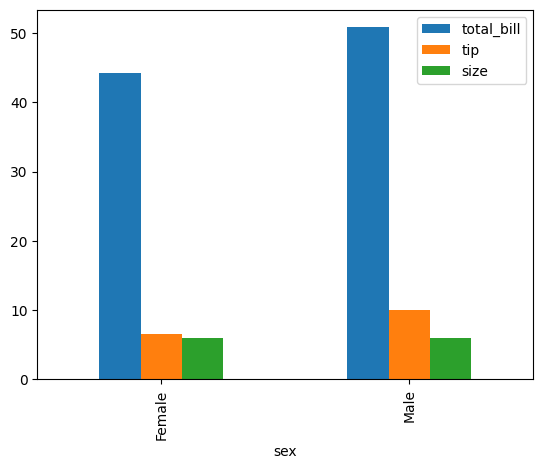

In [28]:
tips.groupby('sex').max().plot.bar()

In [32]:
tips.drop('sex_num', axis=1 )
tips

,total_bill,tip,sex,smoker,day,time,size,sex_num
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,Male
2,21.01,3.50,Male,No,Sun,Dinner,3,Male
3,23.68,3.31,Male,No,Sun,Dinner,2,Male
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,Male
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,Male
242,17.82,1.75,Male,No,Sat,Dinner,2,Male


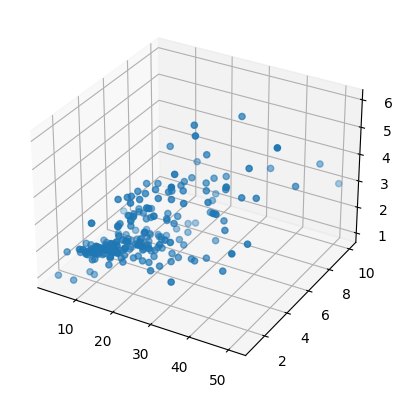

In [42]:
# tips.plot.scatter(x='tip', y='total_bill',z='size')

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = tips.total_bill
y = tips.tip
z = tips['size']

ax.scatter(x, y,z)

In [47]:
tips.sex

d = {
	'Male': 1,
	'Female':0
}

tips['sex_num']=tips.sex.map(d )
tips

,total_bill,tip,sex,smoker,day,time,size,sex_num
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [51]:
drinks = pd.read_csv('../datasets/drinks.csv')
drinks

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [52]:
drinks.continent.value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [62]:
# show the mean 'total_litres_of_pure_alcohol' per continent

drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean()

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

<Axes: ylabel='total_litres_of_pure_alcohol'>

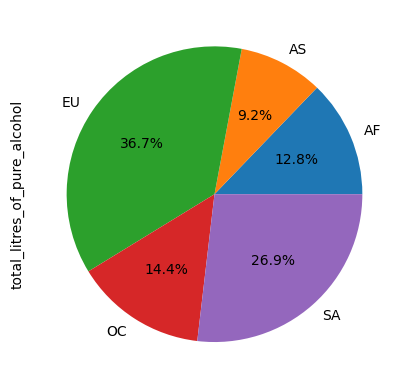

In [67]:
drinks.groupby('continent')['total_litres_of_pure_alcohol'].mean().plot.pie(autopct='%1.1f%%')

In [71]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [74]:
servings_per_continent=drinks.groupby('continent')[['beer_servings','spirit_servings','wine_servings']].mean()
servings_per_continent

,beer_servings,spirit_servings,wine_servings
continent,,,
AF,61.471698,16.339623,16.264151
AS,37.045455,60.840909,9.068182
EU,193.777778,132.555556,142.222222
OC,89.687500,58.437500,35.625000
SA,175.083333,114.750000,62.416667


<Axes: xlabel='continent'>

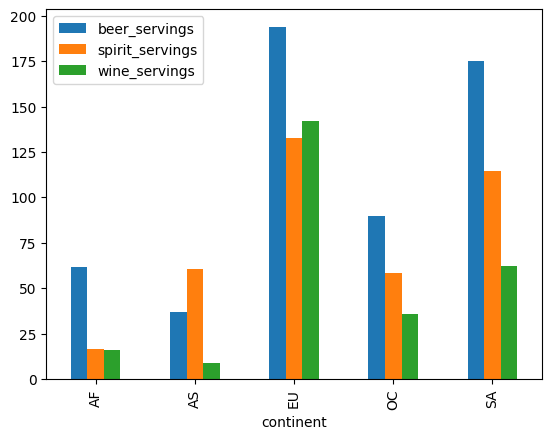

In [75]:
servings_per_continent.plot.bar()